In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to one-hot encoded labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Build a basic ANN model
def build_ann():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))  # Flatten input images
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes
    return model

ann_model = build_ann()

# Compile the ANN model
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the ANN model
ann_history = ann_model.fit(train_images, train_labels, epochs=10,
                            validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.2731 - loss: 1.9925 - val_accuracy: 0.3773 - val_loss: 1.7232
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.3899 - loss: 1.7022 - val_accuracy: 0.4075 - val_loss: 1.6344
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.4227 - loss: 1.6025 - val_accuracy: 0.4219 - val_loss: 1.5885
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.4462 - loss: 1.5445 - val_accuracy: 0.4521 - val_loss: 1.5303
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4651 - loss: 1.4861 - val_accuracy: 0.4491 - val_loss: 1.5390
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.4754 - loss: 1.4659 - val_accuracy: 0.4691 - val_loss: 1.4883
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.4830 - loss: 1.4454 - val_accuracy: 0.4666 - val_loss: 1.5037
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.4964 -

In [ ]:
# Build a basic CNN model
def build_cnn():
    model = models.Sequential()

    # Add Convolutional and Pooling layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten and add fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    return model

cnn_model = build_cnn()

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10,
                            validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3295 - loss: 1.7909 - val_accuracy: 0.5463 - val_loss: 1.2756
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5631 - loss: 1.2240 - val_accuracy: 0.5889 - val_loss: 1.1457
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6291 - loss: 1.0460 - val_accuracy: 0.6178 - val_loss: 1.0710
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6650 - loss: 0.9392 - val_accuracy: 0.6706 - val_loss: 0.9468
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.7032 - loss: 0.8541 - val_accuracy: 0.6805 - val_loss: 0.9182
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.7181 - loss: 0.8079 - val_accuracy: 0.6947 - val_loss: 0.8784
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7364 - loss: 0.7499 - val_accuracy: 0.7045 - val_loss: 0.8539
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7535 -

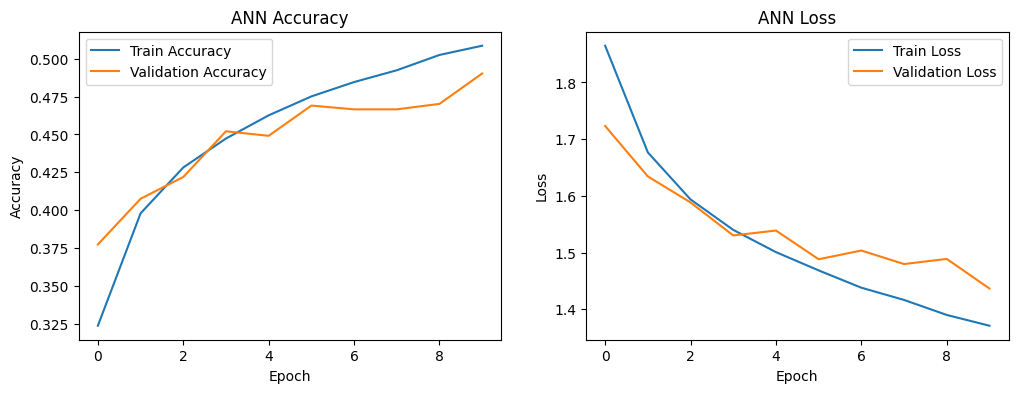

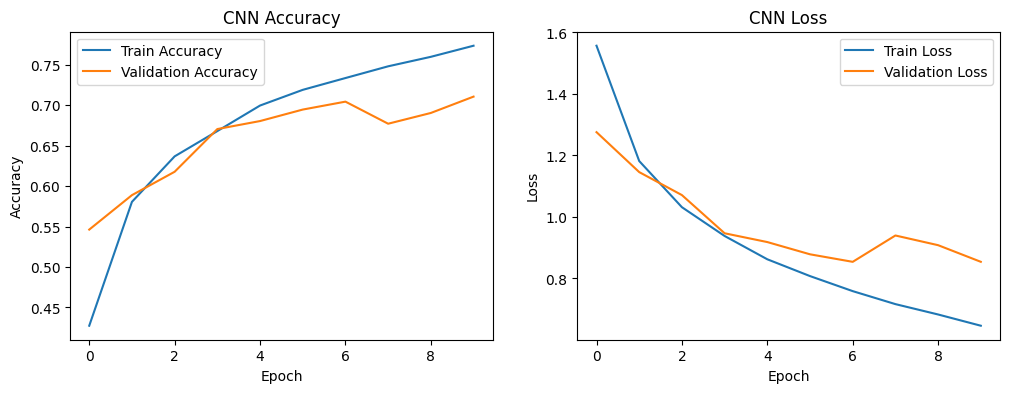

In [ ]:
# Plot accuracy and loss
def plot_history(history, model_type):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_type} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_type} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot for ANN
plot_history(ann_history, "ANN")

# Plot for CNN
plot_history(cnn_history, "CNN")
